In [18]:
%config InlineBackend.figure_formats = ['svg']

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

In [20]:
iris_data = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_data['target'] = iris['target']
iris_data['target'] = iris_data['target'].apply(
    lambda x: iris['target_names'][x])
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [21]:
df = iris_data.query("target=='setosa' | target=='versicolor'")
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


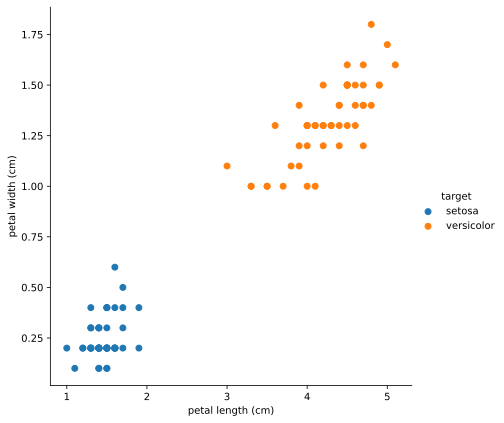

In [22]:
import seaborn as sns
sns.FacetGrid(df, hue='target', height=6
).map(plt.scatter, "petal length (cm)", "petal width (cm)").add_legend()
plt.show()

In [23]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
X = iris_data.drop(columns=['target'])
y = iris_data['target']
logistic_regression.fit(X,y)

/home/steven/.envs/test/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
X_test = [[5.6, 2.4, 3.8, 1.2]]
logistic_regression.predict(X_test)

/home/steven/.envs/test/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['versicolor'], dtype=object)

In [25]:
df = iris_data.query("target=='setosa' | target=='versicolor'")[['sepal length (cm)','sepal width (cm)','target']]
X = df.drop(columns=['target']).values
y = df['target'].values
y = [1 if x == 'setosa' else 0 for x in y]
logistic_regression.fit(X,y)

LogisticRegression()

(1.0, 5.380000000000004)

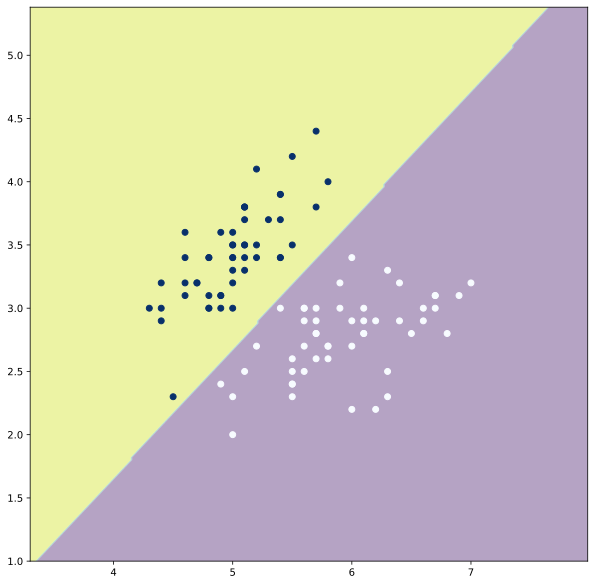

In [26]:
x_min, x_max = X[:, 0].min()-1, X[:,0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min,
y_max, 0.02))
Z = logistic_regression.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.rcParams['figure.figsize']=(10,10)
plt.figure()
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:,0], X[:,1], c=y, cmap='Blues')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())